In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # 进度条

# 10-臂赌博机环境（带随机游走的非平稳环境）
class Bandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.q_star = np.zeros(num_arms)  # 初始时所有 q*(a) 设为 0

    def get_reward(self, action):
        return np.random.normal(self.q_star[action], 1)  # N(q*(a), 1)

    def update_q_star(self):
        """ 每一步后，所有 q*(a) 进行随机游走 """
        self.q_star += np.random.normal(0, 0.01, self.num_arms)

    def optimal_action(self):
        """ 返回当前 q*(a) 最高的拉杆索引 """
        return np.argmax(self.q_star)

# 智能体（固定步长 α）
class Agent:
    def __init__(self, num_arms=10, epsilon=0.1, alpha=0.1):
        self.epsilon = epsilon
        self.alpha = alpha  # 固定步长 α
        self.q_estimates = np.zeros(num_arms)  # 估计的 Q 值
        self.action_counts = np.zeros(num_arms)  # 记录每个动作的选择次数

    def select_action(self):
        """ ε-greedy 选择策略 """
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.q_estimates))  # 10% 随机探索
        else:
            return np.argmax(self.q_estimates)  # 90% 选择当前最优动作

    def update(self, action, reward):
        """ 使用固定步长 α 更新 Q 估计值 """
        self.q_estimates[action] += self.alpha * (reward - self.q_estimates[action])

# 运行实验

def run_experiment(num_steps=10000, num_experiments=2000, epsilon=0.1, alpha=0.1):
    avg_rewards = np.zeros(num_steps)
    optimal_action_pct = np.zeros(num_steps)

    for _ in tqdm(range(num_experiments), desc=f"Running α={alpha}"):
        bandit = Bandit()
        agent = Agent(epsilon=epsilon, alpha=alpha)
        
        for step in range(num_steps):
            action = agent.select_action()
            reward = bandit.get_reward(action)
            agent.update(action, reward)
            bandit.update_q_star()  # q*(a) 进行随机游走

            avg_rewards[step] += reward
            optimal_action_pct[step] += (action == bandit.optimal_action())

    avg_rewards /= num_experiments
    optimal_action_pct = (optimal_action_pct / num_experiments) * 100  # 转换为百分比
    return avg_rewards, optimal_action_pct



In [2]:
# 运行实验，测试不同 α
num_steps = 10000
num_experiments = 2000
epsilon = 0.1

alpha_values = [0.01, 0.05, 0.1, 0.2, 0.5]
rewards_dict = {}
optimal_dict = {}

for alpha in alpha_values:
    rewards_dict[alpha], optimal_dict[alpha] = run_experiment(num_steps, num_experiments, epsilon, alpha=alpha)


Running α=0.5: 100%|██████████| 2000/2000 [03:15<00:00, 10.24it/s]


In [ ]:
plot：

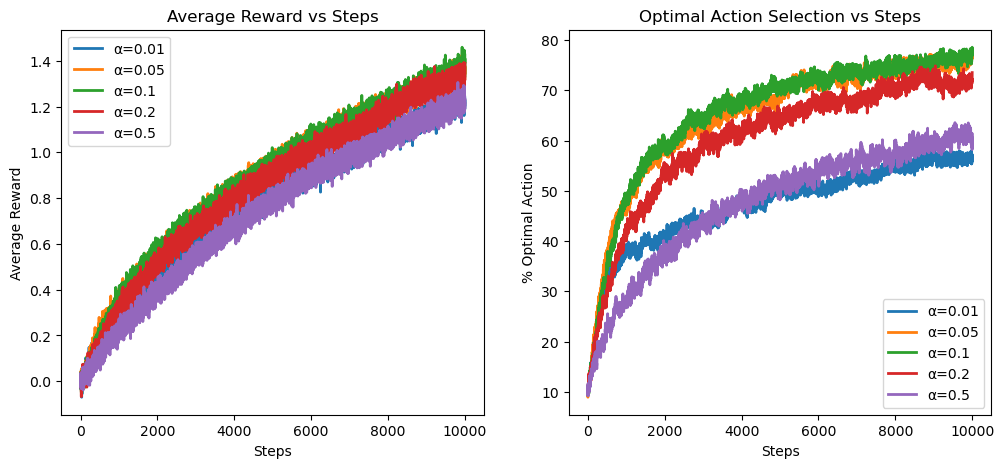

In [3]:

# 🎨 **绘制结果**
plt.figure(figsize=(12, 5))

# 平均奖励曲线
plt.subplot(1, 2, 1)
for alpha in alpha_values:
    plt.plot(rewards_dict[alpha], linewidth=2, label=f'α={alpha}')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward vs Steps")

# 最优动作选择率曲线
plt.subplot(1, 2, 2)
for alpha in alpha_values:
    plt.plot(optimal_dict[alpha], linewidth=2, label=f'α={alpha}')
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()
plt.title("Optimal Action Selection vs Steps")

plt.show()


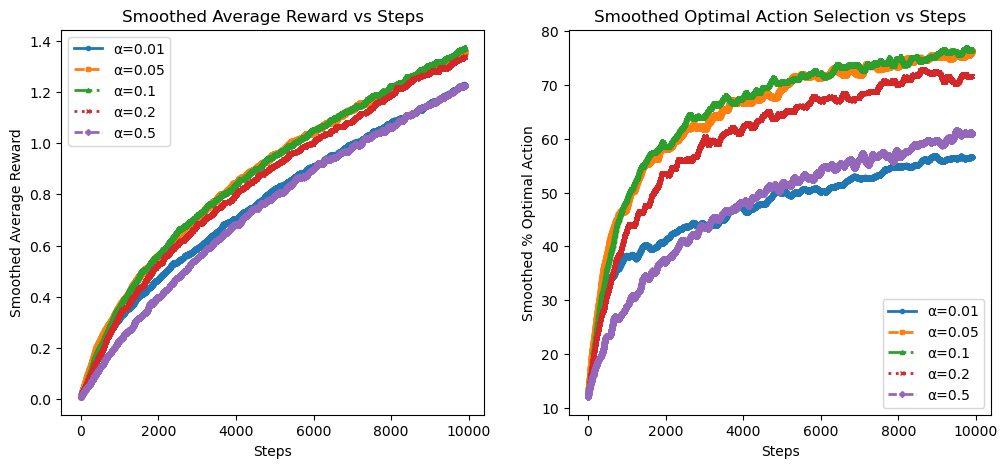

In [4]:
# 🎨 **绘制平滑后的结果**
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

x_smooth = np.arange(len(moving_average(next(iter(rewards_dict.values())))))

plt.figure(figsize=(12, 5))

# 🎯 平均奖励曲线（平滑版）
plt.subplot(1, 2, 1)
for alpha, line_style, marker in zip(alpha_values, ["-", "--", "-.", ":", (0, (3, 1, 1, 1))], ["o", "s", "^", "x", "D"]):
    plt.plot(x_smooth, moving_average(rewards_dict[alpha]), linestyle=line_style, marker=marker, markersize=3, linewidth=2, label=f'α={alpha}')
plt.xlabel("Steps")
plt.ylabel("Smoothed Average Reward")
plt.legend()
plt.title("Smoothed Average Reward vs Steps")

# 🎯 最优动作选择率曲线（平滑版）
plt.subplot(1, 2, 2)
for alpha, line_style, marker in zip(alpha_values, ["-", "--", "-.", ":", (0, (3, 1, 1, 1))], ["o", "s", "^", "x", "D"]):
    plt.plot(x_smooth, moving_average(optimal_dict[alpha]), linestyle=line_style, marker=marker, markersize=3, linewidth=2, label=f'α={alpha}')
plt.xlabel("Steps")
plt.ylabel("Smoothed % Optimal Action")
plt.legend()
plt.title("Smoothed Optimal Action Selection vs Steps")

plt.show()


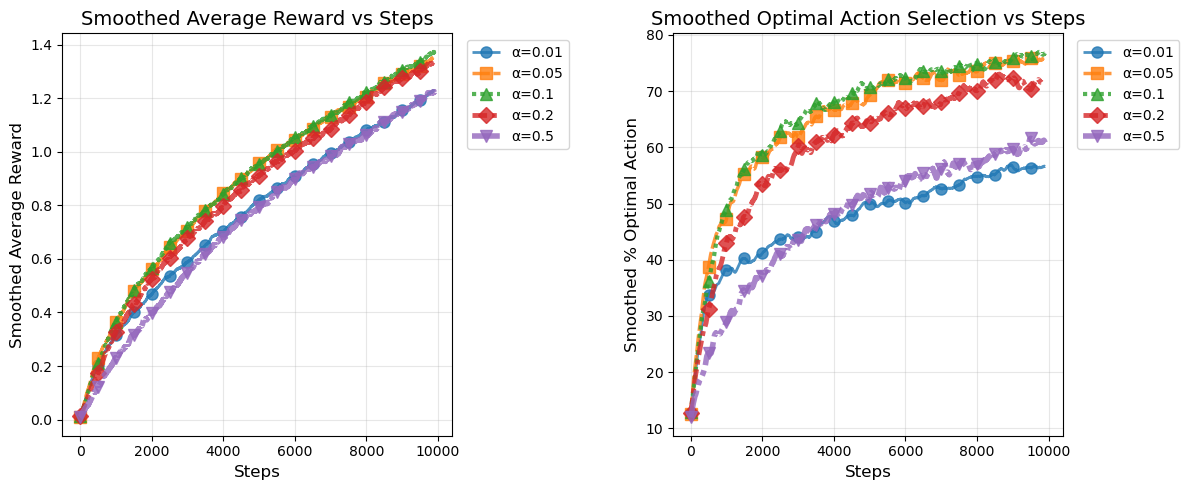

In [6]:
# Smooth results using moving average
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

x_smooth = np.arange(len(moving_average(next(iter(rewards_dict.values())))))

plt.figure(figsize=(12, 5))
plt.style.use('default')  # 使用默认样式替代seaborn

# Define line styles for better distinction
line_styles = [
    (0, ()), # solid
    (0, (5, 1)), # dashed
    (0, (1, 1)), # densely dotted
    (0, (3, 1, 1, 1)), # dash-dot
    (0, (5, 1, 1, 1, 1, 1)) # dash-dot-dot
]

# Use larger markers with reduced frequency
markers = ['o', 's', '^', 'D', 'v']
markevery = 500  # Display marker every 500 points

# Smoothed average reward curve
plt.subplot(1, 2, 1)
for i, (alpha, line_style, marker) in enumerate(zip(alpha_values, line_styles, markers)):
    plt.plot(x_smooth, moving_average(rewards_dict[alpha]),
            linestyle=line_style,
            marker=marker,
            markevery=markevery,
            markersize=8,
            linewidth=2 + i*0.5,  # Gradually increase line width
            label=f'α={alpha}',
            alpha=0.8)  # Add transparency

plt.xlabel("Steps", fontsize=12)
plt.ylabel("Smoothed Average Reward", fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Smoothed Average Reward vs Steps", fontsize=14)
plt.grid(True, alpha=0.3)

# Smoothed optimal action selection rate curve
plt.subplot(1, 2, 2)
for i, (alpha, line_style, marker) in enumerate(zip(alpha_values, line_styles, markers)):
    plt.plot(x_smooth, moving_average(optimal_dict[alpha]),
            linestyle=line_style,
            marker=marker,
            markevery=markevery,
            markersize=8,
            linewidth=2 + i*0.5,  # Gradually increase line width
            label=f'α={alpha}',
            alpha=0.8)  # Add transparency

plt.xlabel("Steps", fontsize=12)
plt.ylabel("Smoothed % Optimal Action", fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Smoothed Optimal Action Selection vs Steps", fontsize=14)
plt.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout(w_pad=4)
plt.show()